<a href="https://colab.research.google.com/github/Dushe4ka/VGG_models/blob/main/VGG_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import torch
import torch.nn as nn

# VGG11

In [ ]:
class VGG11(nn.Module):
    def __init__(self, num_classes=1000, dropout=0.5):
        super().__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(64, 128, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(128, 256, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(256, 256, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(256, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.Conv2d(512, 512, (3, 3), padding=1),
            nn.ReLU(True),
            nn.MaxPool2d(2)
        )

        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        out = self.classifier(x)
        return out


In [ ]:
model = VGG11()

inp = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = model(inp)
print(pred.shape)

torch.Size([1, 1000])


VGG11(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (11): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (14): ReLU(inplace=True)
    (15): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)

# Общий класс VGG

In [ ]:
class VGG(nn.Module):
    _cfgs = {
        "vgg_11": [64, "M", 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
        "vgg_13": [64, 64, "M", 128, 128, "M", 256, 256, "M", 512, 512, "M", 512, 512, "M"],
        "vgg_16": [64, 64, "M", 128, 128, "M", 256, 256, 256, "M", 512, 512, 512, "M", 512, 512, 512, "M"],
        "vgg_19": [64, 64, "M", 128, 128, "M", 256, 256, 256, 256, "M", 512, 512, 512, 512, "M", 512, 512, 512, 512, "M"]
    }

    def __init__(self, name, num_classes=1000, dropout=0.5):
        super().__init__()
        self.cfg = self._cfgs[name]

        self.features = self.make_layers(self.cfg)
        self.flatten = nn.Flatten()
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, 4096),
            nn.ReLU(True),
            nn.Dropout(p=dropout),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        x = self.features(x)
        x = self.flatten(x)
        out = self.classifier(x)
        return out

    def make_layers(self, cfg):
        layers = []
        in_channels = 3
        for value in cfg:
            if value == "M":
                layers += [nn.MaxPool2d(2)]
            else:
                conv2d = nn.Conv2d(in_channels, value, (3,3), padding=1)
                layers += [conv2d, nn.ReLU(True)]
                in_channels = value
        return nn.Sequential(*layers)

In [60]:
model = VGG("vgg_19")
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padd

In [61]:
inp = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = model(inp)
print(pred.shape)

torch.Size([1, 1000])


# Готовая архитектура VGG в tourchvision

In [62]:
import torchvision
from torchvision import models
import torchvision.transforms as v1
from torchvision.transforms import v2
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('dark_background')


In [63]:
vg11 = models.vgg11()
# vgg13 = models.vgg13(pretrained=True)


In [64]:
vgg19 = models.vgg19(weights="DEFAULT")
# vgg19 = models.vgg19(weights="IMAGENET1K_V!")
# Одно и то же

In [ ]:
inp = torch.rand([1, 3, 224, 224], dtype=torch.float32)
pred = vgg19(inp)
print(pred.shape)

torch.Size([1, 1000])


# Обученные веса всех моделей

In [66]:
weight_vgg11 = models.VGG11_Weights.IMAGENET1K_V1
weight_vgg13 = models.VGG13_Weights.DEFAULT
weight_vgg16 = models.VGG16_Weights.DEFAULT
weight_vgg19 = models.VGG19_Weights.DEFAULT

In [ ]:
vgg16 = models.vgg16(weights=weight_vgg16)

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:11<00:00, 48.1MB/s]


In [ ]:
# url для скачивания обученных весов

url = weight_vgg19.url
url

'https://download.pytorch.org/models/vgg19-dcbb9e9d.pth'

In [69]:
# Трансформации, которые применялись к изображениям при тренировке.

transform_default = weight_vgg19.transforms()
transform_default

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [70]:
# Список с именами классов

class_names = weight_vgg19.meta['categories']
print(type(class_names))
print(len(class_names))
print(class_names[0:10])

<class 'list'>
1000
['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead', 'electric ray', 'stingray', 'cock', 'hen', 'ostrich']


# Предсказания обученной модели

In [81]:
img = Image.open('/content/macaca.jpg')

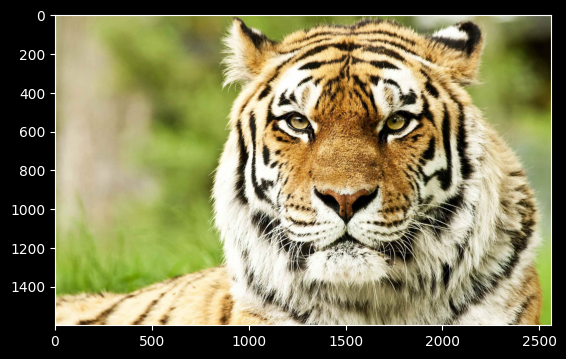

In [72]:
plt.imshow(img)

In [73]:
# Преобразования изображений, которые использовались при обучении.
transform_default = weight_vgg19.transforms()

In [74]:
# Преобразование изображений на основе модуля V1.

size = 224

transform_v1 = v1.Compose([
    v1.Resize(256),
    v1.CenterCrop(size),
    v1.ToTensor(),
    v1.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

In [78]:
# Преобразование изображений на основе модуля V2.

size = 224

transform_v2 = v2.Compose([
    v2.ToImage(),
    v2.Resize(256),
    v2.CenterCrop(size),
    v2.ToDtype(dtype=torch.float32, scale=True),
    v2.Normalize(mean=(0.485, 0.456, 0.406), std=(0.229, 0.224, 0.225))
])

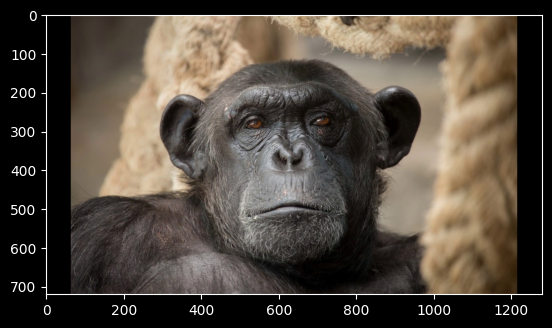

transform_default:
  chimpanzee => 0.94264

transform_v1:
  chimpanzee => 0.94264

transform_v2:
  chimpanzee => 0.94244



In [82]:
transforms = {
    "transform_default": transform_default,
    "transform_v1": transform_v1,
    "transform_v2": transform_v2
}

plt.imshow(img)
plt.show()

vgg19.eval()
for name, transform in transforms.items():
    print(f'{name}:')
    img_in = transform(img).unsqueeze(dim=0)         # img => transform => (3, 224, 224) => unsqueese => (1, 3, 224, 224) => img_in
    pred = vgg19(img_in).squeeze()            # (1, 1000) => (1000)

    sorted, indices = pred.softmax(dim=0).sort(descending=True)
    for i, (s, ind) in enumerate(zip(sorted, indices)):
        print(f'  {class_names[ind]} => {s:.5f}')
        if 1//1:
            break
    print("================", end='\n\n')

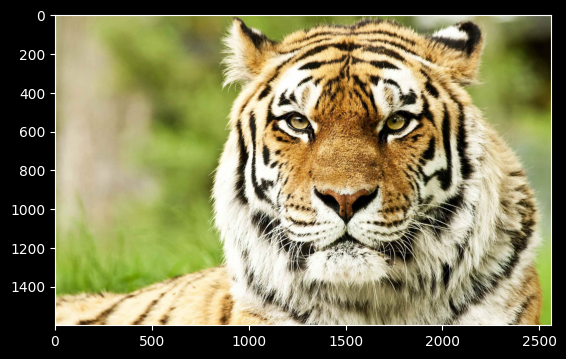

  tiger => 0.71820



In [ ]:
plt.imshow(img)
plt.show()

vgg19.eval()
img_in = transform_v1(img).unsqueeze(dim=0)         # img => transform => (3, 224, 224) => unsqueese => (1, 3, 224, 224) => img_in
pred = vgg19(img_in).squeeze()            # (1, 1000) => (1000)

sorted, indices = pred.softmax(dim=0).sort(descending=True)
for i, (s, ind) in enumerate(zip(sorted, indices)):
    print(f'  {class_names[ind]} => {s:.5f}')
    if 1//1:
        break
print("================", end='\n\n')